Deep Learning with tensorflow


1.  Data taken from kaggle
2.  Main Library --> tensorflow.keras
3.  Using MobileNet model



In this section we are importing data from kaggle

In [ ]:
#1
! pip install -q kaggle

#2
from google.colab import files

files.upload()

#3
! mkdir ~/.kaggle

#4
! cp kaggle.json ~/.kaggle/

#5
! chmod 600 ~/.kaggle/kaggle.json

#6
! kaggle datasets list

#7
!kaggle datasets download -d drgfreeman/rockpaperscissors

#8
! mkdir train

#9
! unzip rockpaperscissors.zip -d train

#10
cd train/

#11
ls

After downloding data we will convert it to insert into traning part

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(1/255.0)
data = generator.flow_from_directory("train/rps-cv-images",target_size=(224,224),batch_size=50,class_mode="categorical")


Found 2188 images belonging to 3 classes.


In [44]:
print(data.class_indices)
target = ["paper","rock","scissors"]

{'paper': 0, 'rock': 1, 'scissors': 2}


After setting your data now we will create our model for traning

In [8]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input,Flatten,Dense,Dropout
from tensorflow.keras.models import Model


In [9]:
baseModel = MobileNet(include_top=False,input_tensor=Input(shape=(224,224,3)))

In [10]:
headModel = baseModel.output
headModel = Flatten(name="MY_ONE")(headModel)
headModel = Dense(120,activation="relu",name="MY_TWO")(headModel)
headModel = Dropout(.5)(headModel)
headModel = Dense(60,activation="relu",name="MY_Three")(headModel)

headModel = Dense(3,activation="softmax",name="MY_FOur")(headModel)

In [11]:
model = Model(inputs = baseModel.input,outputs = headModel)

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [13]:
for layers in baseModel.layers:
  layers.trainable = False

In [14]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [15]:
history = model.fit_generator(data,epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


44/44 [==============================] - 6s 130ms/step - loss: 1.2066 - accuracy: 0.8675
Epoch 2/10
44/44 [==============================] - 6s 131ms/step - loss: 0.1710 - accuracy: 0.9570
Epoch 3/10
44/44 [==============================] - 6s 129ms/step - loss: 0.1134 - accuracy: 0.9662
Epoch 4/10
44/44 [==============================] - 6s 131ms/step - loss: 0.0874 - accuracy: 0.9771
Epoch 5/10
44/44 [==============================] - 6s 131ms/step - loss: 0.0462 - accuracy: 0.9826
Epoch 6/10
44/44 [==============================] - 6s 130ms/step - loss: 0.0669 - accuracy: 0.9790
Epoch 7/10
44/44 [==============================] - 6s 132ms/step - loss: 0.0343 - accuracy: 0.9872
Epoch 8/10
44/44 [==============================] - 6s 134ms/step - loss: 0.0285 - accuracy: 0.9922
Epoch 9/10
44/44 [==============================] - 6s 133ms/step - loss: 0.0496 - accuracy: 0.9822
Epoch 10/10
44/44 [==============================] - 6s 130ms/step - loss: 0.0540 - accuracy: 0.9817


We trained our model now we will predict our modal accuracy

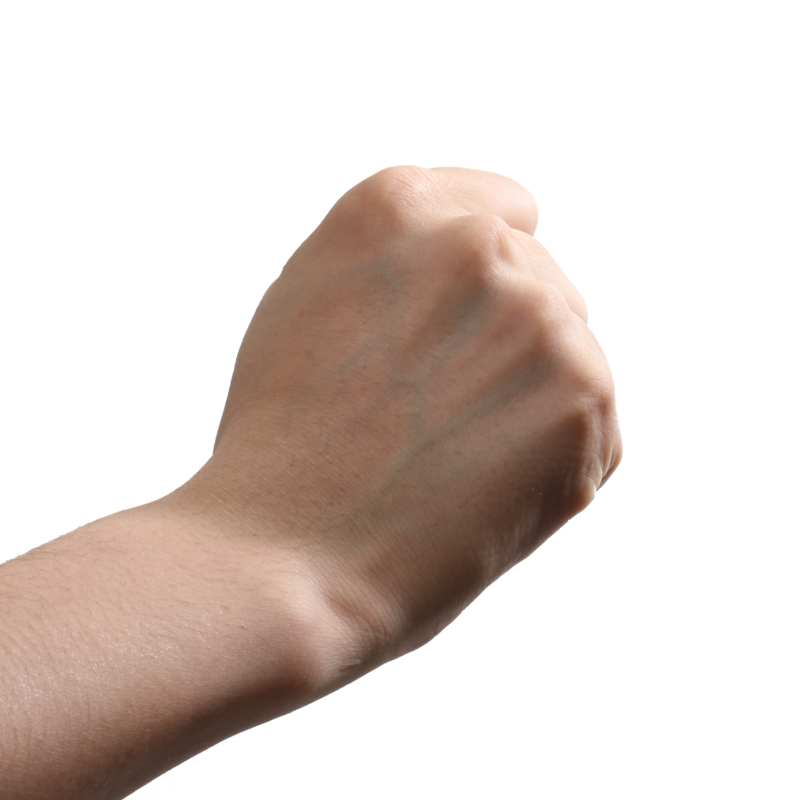

In [31]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from PIL import Image
import numpy as np

Image.open("1.png")

In [32]:
img = load_img("1.png",target_size=(224,224))
img = img_to_array(img)
img = np.expand_dims(img,axis=0)

pred =model.predict(img)
print("Image You passed looks like",target[pred.argmax()])

rock
